<h1> <b>Telecommunications Customer Churn Data Model </b> </h1>

In [1]:
!pip install scikit-plot
!pip install -U imbalanced-learn
!pip install prince
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install xgboost

Requirement already up-to-date: imbalanced-learn in c:\users\sleung225\anaconda3\lib\site-packages (0.7.0)


In [2]:
# Importing libraries
import pandas as pd
import numpy as np

import scikitplot as skplt
import prince # for multiple correspondence analysis
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler #balance data
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Exploratory Data Analysis</h2>

<b>Create a dataframe and evaluate the necessary columns for analysis.</b>
<br>Creates churn1 dataframe.</br>

In [3]:
# Import data and review the size of the dataset
churn1 = pd.read_excel('path_here') #original dataframe that does not have any changes
print(churn1.shape)
print("The data set contains: {} rows and {} columns".format(churn1.shape[0], churn1.shape[1]))

(7043, 21)
The data set contains: 7043 rows and 21 columns


<h3>Data Dictionary</h3>
<br></br>
<li>customerID - Customer unique identifier</li>
<li>gender - Customer gender - ['Female' 'Male']</li>
<li>SeniorCitizen - Elderly or retired person, a senior citizen is someone who has at least attained the age of 60 or 65 years</li>
<li>Partner - - ['No' 'Yes']</li>
<li>Dependents - If customer has dependents - ['No' 'Yes']</li>
<li>Tenure - Customer lifespan (in months)</li>
<li>PhoneService - - ['No' 'Yes']</li>
<li>MultipleLines - - ['No' 'No phone service' 'Yes']</li>
<li>InternetService - - ['No' 'No internet service' 'Yes']</li>
<li>OnlineSecurity - - ['No' 'No internet service' 'Yes']</li>
<li>OnlineBackup - - ['No' 'No internet service' 'Yes']</li>
<li>DeviceProtection - - ['No' 'No internet service' 'Yes']</li>
<li>TechSupport - - ['No' 'No internet service' 'Yes']</li>
<li>StreamingTV - - ['No' 'No internet service' 'Yes']</li>
<li>StreamingMovies - - ['No' 'No internet service' 'Yes']</li>
<li>Contract - Type of contract - ['Month-to-month' 'One year' 'Two year']</li>
<li>PaperlessBilling - - ['No' 'Yes']</li>
<li>PaymentMethod - payment method - ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check (check)', 'Mailed check (check)']</li>
<li>MonthlyCharges - Monthly Recurring Charges</li>
<li>TotalCharges - Life time value</li>
<b><li>Churn - Churn value, the target variable - ['No' 'Yes']</li></b>

<b>Explore the data types in this data set.</b>

In [4]:
churn1.info() # Obtain features of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn1.dtypes # data types of dataset columns
print("Number of categorical features : {}".format(len(churn1.select_dtypes(include=['object']).columns)))
print("Number of numerical features : {}".format(len(churn1.select_dtypes(include=['int64', 'float64']).columns)))

Number of categorical features : 18
Number of numerical features : 3


<b>Check for null values in data and replace, if necessary.</b>

In [6]:
# print missing values
print("Missing values (per feature): \n{}\n".format(churn1.isnull().sum()))

Missing values (per feature): 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



<b>Review the unique data values of each column.</b>

In [7]:
churn1.nunique() # Determine unique data values of the columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

<b>Drop redunant columns.</b>

In [8]:
# Drop customerID and TotalCharges because it does not serve a value to the analysis.
churn1.drop(['customerID','TotalCharges'], axis=1, inplace=True)
churn1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [9]:
print("Number of categorical features : {}".format(len(churn1.select_dtypes(include=['object']).columns)))
print("Number of numerical features : {}".format(len(churn1.select_dtypes(include=['int64', 'float64']).columns)))

Number of categorical features : 16
Number of numerical features : 3


<h2>Data Preparation</h2>
<br>Uses churn1 dataframe.</br> 
<br>Creates churn2 dataframe.</br>

<h3><b>Test for collinearity</b></h3>

<b>Recode columns to replace Yes/No to 1/0.</b>

In [10]:
columns_to_convert = ['Partner', 
                      'Dependents',
                      'SeniorCitizen',
                      'gender',
                      'tenure',
                      'PhoneService',
                      'MultipleLines',
                      'InternetService',
                      'PaperlessBilling',
                      'PaymentMethod',
                      'MonthlyCharges',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'Contract',
                      'Churn']

for item in columns_to_convert:
    churn1[item].replace(to_replace='Yes', value=1, inplace=True)
    churn1[item].replace(to_replace='No',  value=0, inplace=True)
    churn1[item].replace(to_replace='No phone service',  value=0, inplace=True)
churn1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1


<b>Balance the number of churned customers with the number of customers who did not churn.</b>

In [11]:
churners_number = len(churn1[churn1['Churn'] == 1])
print("Number of churners", churners_number)

churners = (churn1[churn1['Churn'] == 1])

non_churners = churn1[churn1['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
churn2 = churners.append(non_churners)

Number of churners 1869
Number of non-churners 1869


<b>Create heatmap to visualize the linear relationships among each variable.</b>

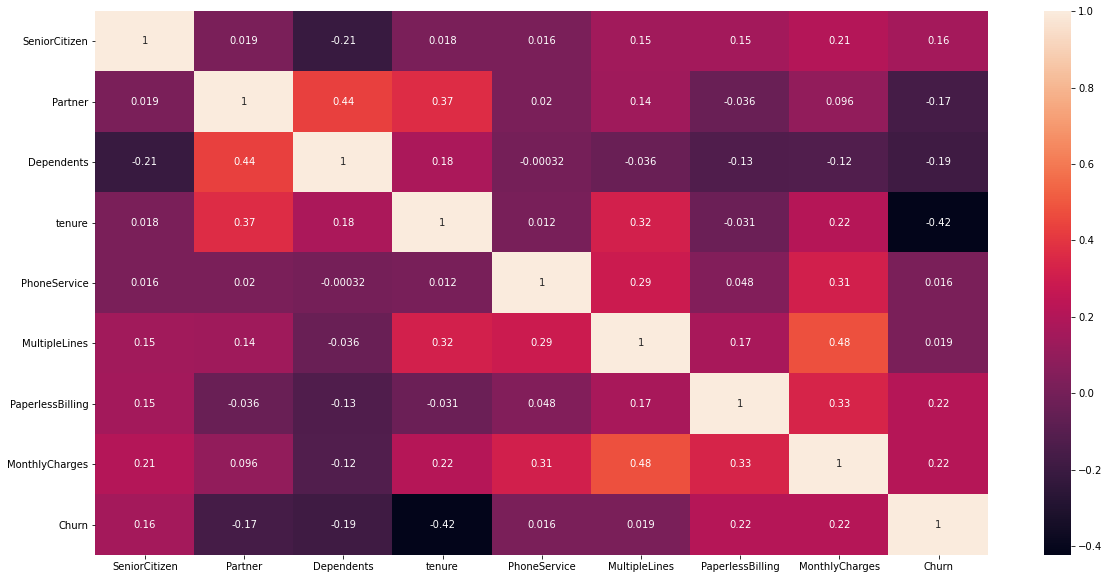

In [12]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(churn2,show_chart=True)

<h3><b>Multiple Correspondence Analysis (MCA)</b></h3>
<br><b>Multiple Correspondence Analysis:</b> used to determine how close input categorical features are to the target variable customer churn and to each other.</br>
<br>Uses churn1 dataframe.</br> 
<br>Creates churn3 dataframe.</br>

In [13]:
churn1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1


<b>Recode any values in the dataframe from numeric to categorical.</b>

In [14]:
# Recode target variable, Churn
chur = {0 : 'No',
        1 : 'Yes'}
churn1['Churn'] = churn1['Churn'].map(chur)
churn1['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# Recode numeric to categorical
senior = {0 : 'No',
        1 : 'Yes'}

churn1['SeniorCitizen'].replace(senior, inplace=True)

def tenure(data):
    if 0 < data  <= 24 :
        return 'Short'
    else:
        return 'Long'

churn1['tenure'] = churn1['tenure'].apply(tenure)

def charges(data):
    if 0 < data  <= 70 :
        return 'LowCharge'
    else:
        return 'HighCharge'

churn1['MonthlyCharges'] = churn1['MonthlyCharges'].apply(charges)
recode = {'No phone service' : 'No',
          'No internet service' : 'No',
            'Fiber optic' : 'Fberoptic',
            'Month-to-month' : 'MtM',
            'Two year' : 'TwoYr',
            'One year' : 'OneYr' ,
            'Electronic check' : 'check',
            'Mailed check' : 'check',
            'Bank transfer (automatic)' : 'automatic',
            'Credit card (automatic)' : 'automatic'
            }

churn1.replace(recode, inplace=True)

In [16]:
# Recode independent variables
columns_to_convert = ['Partner', 
                      'Dependents',
                      'gender',
                      'PhoneService',
                      'MultipleLines',
                      'PaperlessBilling',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies']

for item in columns_to_convert:
    churn1[item].replace(to_replace=1, value='Yes', inplace=True)
    churn1[item].replace(to_replace=0,  value='No', inplace=True)
churn1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,No,Yes,No,Short,No,No,DSL,No,Yes,No,No,No,No,MtM,Yes,check,LowCharge,No
1,Male,No,No,No,Long,Yes,No,DSL,Yes,No,Yes,No,No,No,OneYr,No,check,LowCharge,No
2,Male,No,No,No,Short,Yes,No,DSL,Yes,Yes,No,No,No,No,MtM,Yes,check,LowCharge,Yes
3,Male,No,No,No,Long,No,No,DSL,Yes,No,Yes,Yes,No,No,OneYr,No,automatic,LowCharge,No
4,Female,No,No,No,Short,Yes,No,Fberoptic,No,No,No,No,No,No,MtM,Yes,check,HighCharge,Yes


<b>Create MCA Graph to indicate the variables relation to Churn.</b>

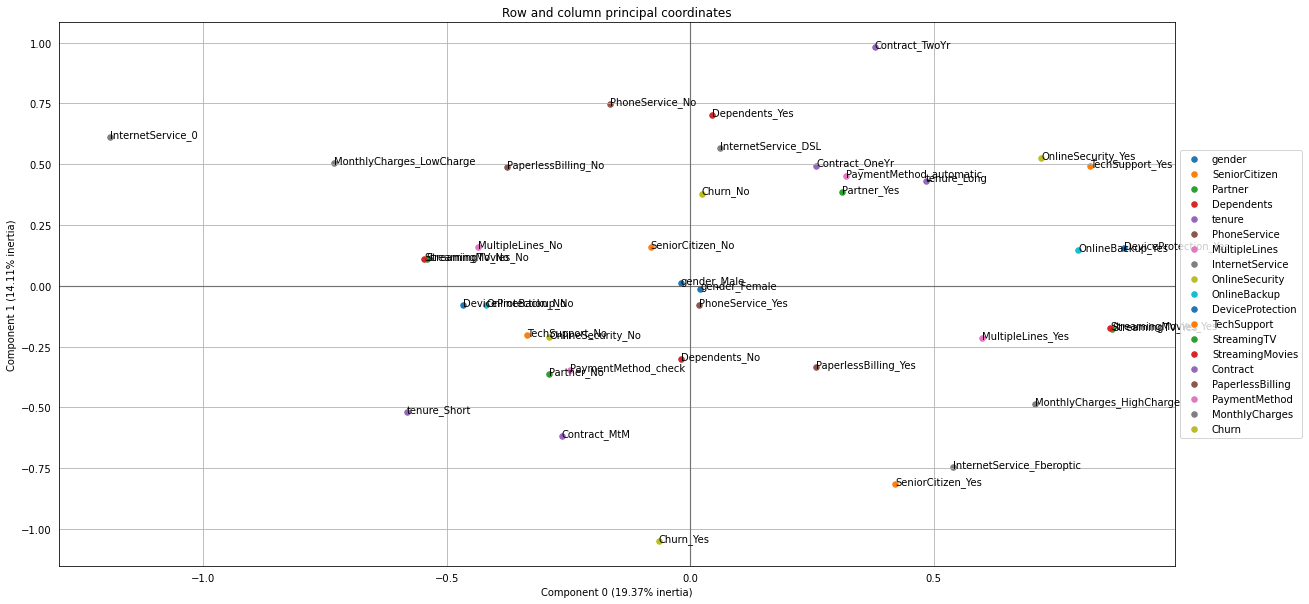

In [17]:
mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
churn_mca = mca.fit(churn1)

ax = churn_mca.plot_coordinates(
        X=churn1,
        ax=None,
        figsize=(20, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.figure.savefig("mca.png", dpi=600) # Saves graph to desktop

<b>Create dummy variables for Chi-square test on categorical features</b>

In [18]:
churn3 = pd.get_dummies(churn1, drop_first=True)

In [19]:
print(churn3.shape)
print("The data set contains: {} rows and {} columns".format(churn1.shape[0], churn1.shape[1]))
print("Features after get_dummies:\n", list(churn1.columns))

(7043, 21)
The data set contains: 7043 rows and 19 columns
Features after get_dummies:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn']


In [20]:
X = churn3.drop('Churn_Yes', axis=1) # input categorical features
y = churn3['Churn_Yes'] # target variable

<b>Categorical features to select for customer attrition prediction.</b>

In [21]:
# categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)
# print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 gender_Male: 0.258699
 SeniorCitizen_Yes: 134.351545
 Partner_Yes: 82.412083
 Dependents_Yes: 133.036443
 tenure_Short: 372.654914
 PhoneService_Yes: 0.097261
 MultipleLines_Yes: 6.548512
 InternetService_DSL: 71.313180
 InternetService_Fberoptic: 374.476216
 OnlineSecurity_Yes: 147.295858
 OnlineBackup_Yes: 31.217694
 DeviceProtection_Yes: 20.226662
 TechSupport_Yes: 135.559783
 StreamingTV_Yes: 17.334235
 StreamingMovies_Yes: 16.242531
 Contract_OneYr: 176.123171
 Contract_TwoYr: 488.578090
 PaperlessBilling_Yes: 105.680863
 PaymentMethod_check: 135.084515
 MonthlyCharges_LowCharge: 148.208006


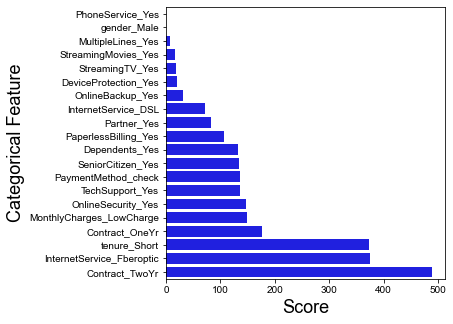

In [22]:
# plot the scores
dataset = pd.DataFrame()
dataset['feature'] = X.columns[ range(len(sf_fit.scores_))]
dataset['scores'] = sf_fit.scores_
dataset = dataset.sort_values(by='scores', ascending=True)

plt.figure(figsize=(5,5))
sns.barplot(dataset['scores'], dataset['feature'], color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()


Categorical features with the highest values for the chi-squared stat indicate higher relevance and importance in predicting customer churn and may be included in a predictive model development.

<h3><b>Logistic Regression</b></h3>
<br>Uses df_clean dataframe.</br> 
<br>Creates df_proc dataframe.</br>


In [23]:
df_clean = pd.read_excel('path_here') #clean dataframe for regression
df_clean.drop(['customerID','TotalCharges'], axis=1, inplace=True)
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


<b>Split features into binary, numeric or categorical to retrieve dummy variables.</b>

In [24]:
binary_feat = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean.select_dtypes('object').columns.to_list() if col not in binary_feat + 
                    numeric_feat ]

df_proc = df_clean.copy()

In [25]:
le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])

In [26]:
print(categorical_feat)
df_proc = pd.get_dummies(df_proc, columns=categorical_feat)
print(df_proc.columns)

['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'Churn',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'Streamin

In [27]:
# Compare original vs processed dataset.
print('Original dataset: ', churn1.shape) 
print('Processed dataset: ', df_proc.shape)

df_proc.head()

Original dataset:  (7043, 19)
Processed dataset:  (7043, 40)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,1,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,1,1,...,1,0,0,1,0,0,0,0,1,0


<b>Split train and test data.</b>

In [28]:
# split df_proc in feature matrix and target vector
X=df_proc.drop('Churn', axis=1)
y=df_proc['Churn']

# split df_proc between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
# cross-validation function
def val_model(X, y, clf, quite=False):
  """
    Make cross-validation for a given model

    # Arguments
      X: DataFrame, feature matrix
      y: Series, target vector
      clf: classifier from scikit-learn
      quite: bool, indicate if funcion should print the results

    # Returns
      float, validation scores

  """

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')

  if quite == False:
    print("##### ", clf.__class__.__name__, " #####")
    print("scores:", scores)
    print("recall: {:.3f} (+/- {:.2f})".format(scores.mean(), scores.std()))

  return scores.mean()

def getClfRecallScores(X_train, y_train, *clf_list):
  """
  Provides recall score for a given list of models

  # Arguments
    X_train: X_train
    y_train: y_train
    *clf_list: list of classifiers

  # Returns
    DataFrame, recall scores

  """

  model_name = []
  recall = []

  for model in clf_list:
    model_name.append(model.__class__.__name__)
    recall.append(val_model(X_train, y_train, model))
  
  return pd.DataFrame(data=recall, index=model_name, columns=['Recall']).sort_values(by='Recall', ascending=False)

In [30]:
# under sampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

In [31]:
np.unique(y_train_rus, return_counts=True)

(array([0, 1]), array([1400, 1400], dtype=int64))

In [32]:
# standardizing X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_rus = scaler.fit_transform(X_train_rus)
X_test = scaler.transform(X_test)

<b>Retrieve recall scores for each modeling technique.</b>

In [33]:
# picked these four because they are ideal for regression or classification techniques
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()

df_scores = getClfRecallScores(X_train_rus, y_train_rus, dt, svc, lr, xgb)

print(df_scores)

#####  DecisionTreeClassifier  #####
scores: [0.675      0.7        0.7        0.68928571 0.68214286]
recall: 0.689 (+/- 0.01)
#####  SVC  #####
scores: [0.81428571 0.81071429 0.825      0.81071429 0.83928571]
recall: 0.820 (+/- 0.01)
#####  LogisticRegression  #####
scores: [0.76071429 0.79285714 0.81071429 0.80714286 0.79642857]
recall: 0.794 (+/- 0.02)
#####  XGBClassifier  #####
scores: [0.73571429 0.71071429 0.74642857 0.73571429 0.82857143]
recall: 0.751 (+/- 0.04)
                          Recall
SVC                     0.820000
LogisticRegression      0.793571
XGBClassifier           0.751429
DecisionTreeClassifier  0.689286


Logistic Regression has one of the highest recall score. This is the best technique for binary variable classification so I will choose this data mining method.

<b>Tweak Logistic Regression Model to increase accuracy.</b>

In [34]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

lr = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100]}

search = GridSearchCV(lr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.8214285714285714 for {'C': 0.001, 'solver': 'liblinear'}


<b>Logistic Regression Modeling</b>

In [35]:
model_lr = LogisticRegression(solver='liblinear', C=0.001)
model_lr.fit(X_train_rus, y_train_rus)
y_pred_lr = model_lr.predict(X_test)
lr_corr = confusion_matrix(y_test, y_pred_lr, normalize='true')

In [36]:
print('Training model accuracy score:',model_lr.score(X_train, y_train))
print('Testing model accuracy score:',model_lr.score(X_test, y_test))

print('Classification Report:')
print(classification_report(y_test, y_pred_lr))

Training model accuracy score: 0.6904581597879591
Testing model accuracy score: 0.7325383304940375
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1292
           1       0.50      0.79      0.61       469

    accuracy                           0.73      1761
   macro avg       0.70      0.75      0.70      1761
weighted avg       0.80      0.73      0.75      1761



<b>Confusion Matrix for Model</b>

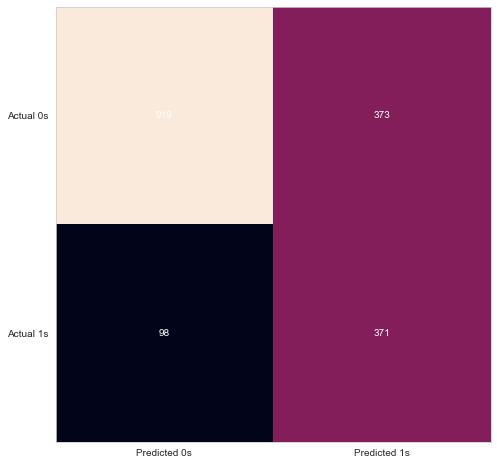

[[919 373]
 [ 98 371]]


In [37]:
cm = confusion_matrix(y_test, y_pred_lr)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()
print(confusion_matrix(y_test, y_pred_lr))

<li>True negatives in the upper-left position: 919</li>
<li>False negatives in the lower-left position: 98</li>
<li>False positives in the upper-right position: 373</li>
<li>True positives in the lower-right position: 371</li>

<h2><b>Data Analysis</b></h2>
<br>Explore the churn data of each category feature.</br>
<br>Recode the cateogory outcomes.</br>
<br>Uses df_clean dataframe.</br>

In [38]:
print("Number of categorical features : {}".format(len(df_clean.select_dtypes(include=['object']).columns)))
print("Number of numerical features : {}".format(len(df_clean.select_dtypes(include=['int64', 'float64']).columns)))
print("The data set contains: {} rows and {} columns".format(df_clean.shape[0], df_clean.shape[1]))
df_clean.head()

Number of categorical features : 16
Number of numerical features : 3
The data set contains: 7043 rows and 19 columns


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


<b>Descriptive statistics summary and visualization for numerical categories.</b>
<br>Convert the numerical columns to categorical features.</br>

In [39]:
#Summary statistics of the numerical categories
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


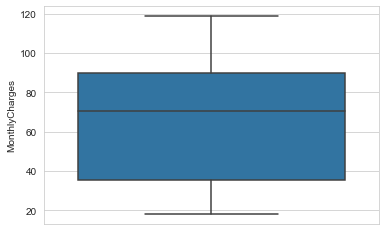

In [40]:
#Boxplot for Monthly and Total Charges.
sns.boxplot( y=df_clean["MonthlyCharges"] )

<b>1. Monthly Charges</b>

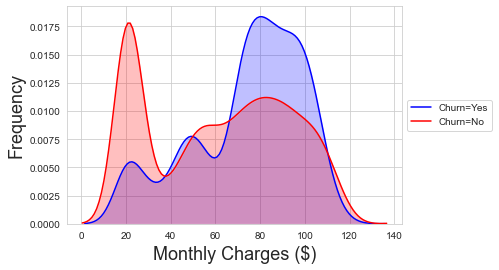

In [41]:
sns.set_style('whitegrid')
g2 = sns.kdeplot(df_clean[df_clean['Churn'] == 'Yes']['MonthlyCharges'], shade=True, color="b", label='Churn=Yes')
g2 = sns.kdeplot(df_clean[df_clean['Churn'] == 'No']['MonthlyCharges'], shade=True, color="r", label='Churn=No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Monthly Charges ($)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [42]:
# Code to define values and coerce the numerical MonthlyCharges into a categorical feature.
def charges(data):
    if 0 < data  <= 70 :
        return 'LowCharge'
    else:
        return 'HighCharge'

df_clean['MonthlyCharges'] = df_clean['MonthlyCharges'].apply(charges)

<b>2. Tenure</b>

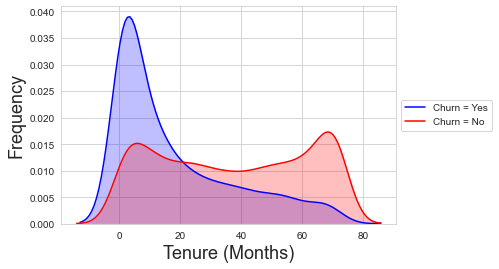

In [43]:
sns.set_style('whitegrid')
g1 = sns.kdeplot(df_clean[df_clean['Churn'] == 'Yes']['tenure'], shade=True, color="b", label='Churn = Yes')
g1 = sns.kdeplot(df_clean[df_clean['Churn'] == 'No']['tenure'], shade=True, color="r", label='Churn = No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Tenure (Months)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [44]:
def display_percent(plot, feature, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10, ha="center")
    plt.show()

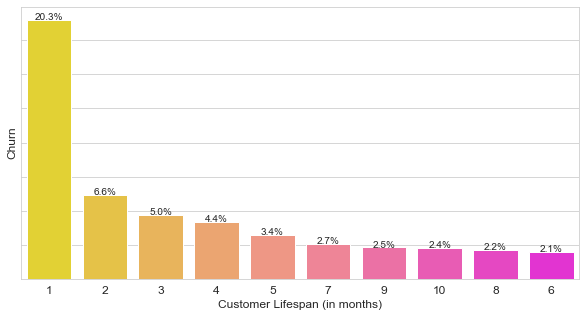

In [45]:
p = sns.color_palette("spring", 10)
p.reverse()

df_top_churn = pd.DataFrame(df_clean[df_clean['Churn'] == 'Yes']['tenure'].value_counts().sort_values(ascending=False))
total_churn = df_clean[df_clean['Churn'] == 'Yes'].shape[0]

fig, ax = plt.subplots(figsize=(10,5))
sns_lifespan = sns.barplot( x = df_top_churn[:10].index, y = df_top_churn[:10].tenure, ax=ax, palette=p, order=df_top_churn[:10].index)
plt.xticks(size=12)
plt.xlabel('Customer Lifespan (in months)', size=12)
plt.yticks(size=12)
plt.ylabel('Churn', size=12)
plt.tick_params(labelleft=False)

display_percent(ax, df_top_churn, total_churn)

In [46]:
# Code to define values and coerce the numerical tenure into a categorical feature.
def tenure(data):
    if 0 < data  <= 24 :
        return 'Short'
    else:
        return 'Long'

df_clean['tenure'] = df_clean['tenure'].apply(tenure)

<b>3. Recode Senior Citizen from numeric to categorical.</b>
<br>Recode any additional columns.</br>

In [47]:
#Recode SeniorCitizen
senior = {0 : 'No',
        1 : 'Yes'}
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].map(senior)
df_clean['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
recode = {'No phone service' : 'No',
          'No internet service' : 'No',
            'Fiber optic' : 'Fiberoptic',
            'Month-to-month' : 'MtM',
            'Two year' : 'TwoYr',
            'One year' : 'OneYr' ,
            'Electronic check' : 'check',
            'Mailed check' : 'check',
            'Bank transfer (automatic)' : 'automatic',
            'Credit card (automatic)' : 'automatic'
            }
df_clean.replace(recode, inplace=True)
df_clean.isnull().sum().sort_values(ascending=False)

Churn               0
OnlineSecurity      0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
MonthlyCharges      0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
gender              0
dtype: int64

In [49]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,No,Yes,No,Short,No,No,DSL,No,Yes,No,No,No,No,MtM,Yes,check,LowCharge,No
1,Male,No,No,No,Long,Yes,No,DSL,Yes,No,Yes,No,No,No,OneYr,No,check,LowCharge,No
2,Male,No,No,No,Short,Yes,No,DSL,Yes,Yes,No,No,No,No,MtM,Yes,check,LowCharge,Yes
3,Male,No,No,No,Long,No,No,DSL,Yes,No,Yes,Yes,No,No,OneYr,No,automatic,LowCharge,No
4,Female,No,No,No,Short,Yes,No,Fiberoptic,No,No,No,No,No,No,MtM,Yes,check,HighCharge,Yes


<b>Visualize and explore overall churn rate.</b>

Proportion of customers that did churn: 26.5%
Proportion of customers that did not churn: 73.5%


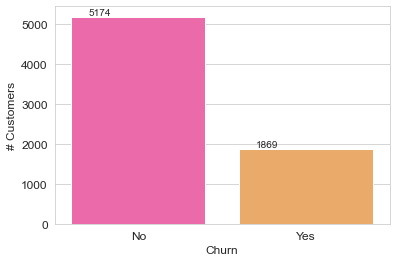

In [50]:
fig, ax = plt.subplots()
sns.countplot(df_clean['Churn'], palette='spring')

plt.xticks(size=12)
plt.xlabel('Churn', size=12)
plt.yticks(size=12)
plt.ylabel('# Customers', size=12)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

mt1 = df_clean.Churn.value_counts(normalize='columns')*100
print("Proportion of customers that did churn: {:.1f}%".format(mt1.iloc[1]))
print("Proportion of customers that did not churn: {:.1f}%".format(mt1.iloc[0]))

<b>Explore individual categorical feature and churn rates.</b>

In [51]:
#Transform dataset from wide to narrow
df_transform = pd.melt(df_clean, id_vars=['Churn'], value_vars=df_clean[df_clean.columns[1:18]],
             var_name='variable1', value_name='event')

#Concatenate two columns to create a descriptive variable name
df_transform['variable2'] = df_transform['variable1'] +'_'+df_transform['event']

col1 = pd.crosstab(df_transform.Churn, df_transform.variable2, normalize='columns').T.add_prefix('churn_')
col2 = col1.assign(**col1.index.to_frame()).sort_values(['churn_Yes']) #sort event based on churn rate
print(col2)

Churn                       churn_No  churn_Yes                   variable2
variable2                                                                  
Contract_TwoYr              0.971681   0.028319              Contract_TwoYr
InternetService_No          0.925950   0.074050          InternetService_No
Contract_OneYr              0.887305   0.112695              Contract_OneYr
tenure_Long                 0.860042   0.139958                 tenure_Long
OnlineSecurity_Yes          0.853888   0.146112          OnlineSecurity_Yes
TechSupport_Yes             0.848337   0.151663             TechSupport_Yes
Dependents_Yes              0.845498   0.154502              Dependents_Yes
PaymentMethod_automatic     0.840183   0.159817     PaymentMethod_automatic
PaperlessBilling_No         0.836699   0.163301         PaperlessBilling_No
MonthlyCharges_LowCharge    0.826012   0.173988    MonthlyCharges_LowCharge
InternetService_DSL         0.810409   0.189591         InternetService_DSL
Partner_Yes 

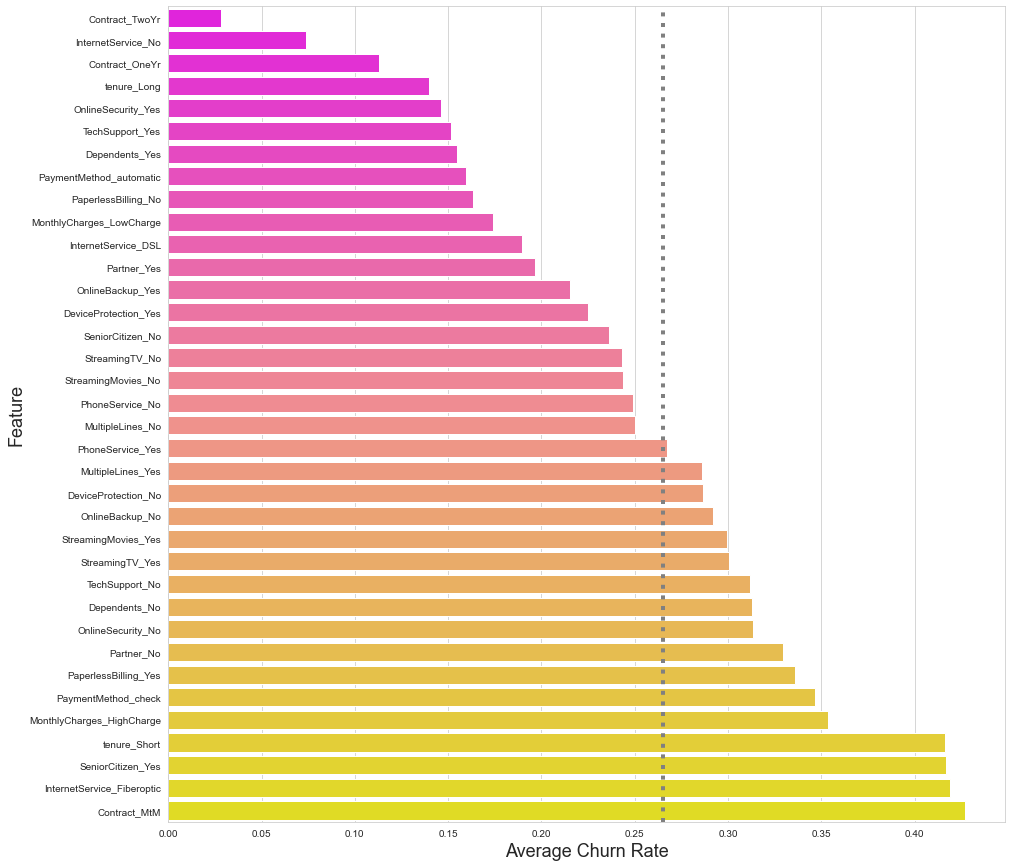

In [52]:
plt.figure(figsize=(15,15))

sns.barplot(y='variable2', x='churn_Yes', data=col2, palette='spring')
t1 = sns.set_style('whitegrid')
plt.xlabel('Average Churn Rate', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.axvline(.265, ls=":", lw=4, color='red', c=".5")
plt.show()

<h3>Exploring Categorical Features</h3>
<br>What are some features that indicate a correlation to high customer churn?</br>

In [53]:
# helper funtion - display count plot
def displayCountPlot(cat_list, df, rows=1, columns=3, figsize=(14,2.5), export=False):
    
  fig, ax = plt.subplots(ncols=columns, figsize=figsize)
  
  idx = 0
  for c in cat_list:
    idx += 1
    plt.subplot(rows, columns, idx)
    ax = sns.countplot(x=df[c], data=df, palette='spring')

    plt.xticks(size=10)
    plt.xlabel('')
    plt.yticks(size=12)
    plt.ylabel('')
    plt.subplots_adjust(hspace = 0.4)
    ax.tick_params(labelleft=False)
    ax.set_title(c, alpha=0.8)

    print_rate(ax, df.shape[0])

def print_rate(ax, total):
  for p in ax.patches:
    text = '{:.1f}% ({})'.format(100 * p.get_height() / total, p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() * 0.5
    ax.annotate(text, (x, y), size = 10, ha="center", va="center")


In [54]:
df_churn = df_clean[df_clean['Churn'] == 'Yes']
df_churn = df_churn.drop('Churn', axis=1)

df_churn.loc[df_churn['SeniorCitizen'] == 0,'SeniorCitizen'] = 'No' 
df_churn.loc[df_churn['SeniorCitizen'] == 1,'SeniorCitizen'] = 'Yes'

lifespan = ['tenure']
personal = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                          'StreamingMovies']
contract = ['Contract', 'PaperlessBilling', 'PaymentMethod']

<h3><b>Understanding the Customer Lifespan</b></h3>

<b>How has the customer lifespan impact the level of customer churn?</b>
<br>Customers are 2.5 times more likely to churn before they hit the two year mark with the company.</br>

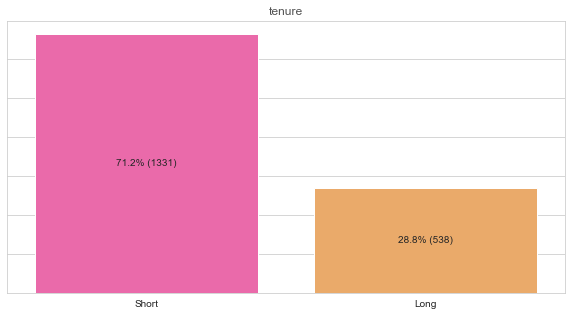

In [55]:
displayCountPlot(lifespan, df_churn, rows=1, columns=1, figsize=(10,5), export=True)

<h3><b>Understanding Customer Profiles</b></h3>
Customer profiles are grouped into three categories: personal attributes, types of services, and contract aspects.

<b>Category by Personal Attributes</b>

<br>Here are some observations:</br>
<br>Gender does not seem to have an impact on churn rate.</br>
<br>Those that have identified as Senior Citizens are 3 times likely to churn.</br>
<br>Those that do not have a partner are almost twice as likely to churn.</br>
<br>Those that do not have dependents are almost five times as likely to churn.</br>

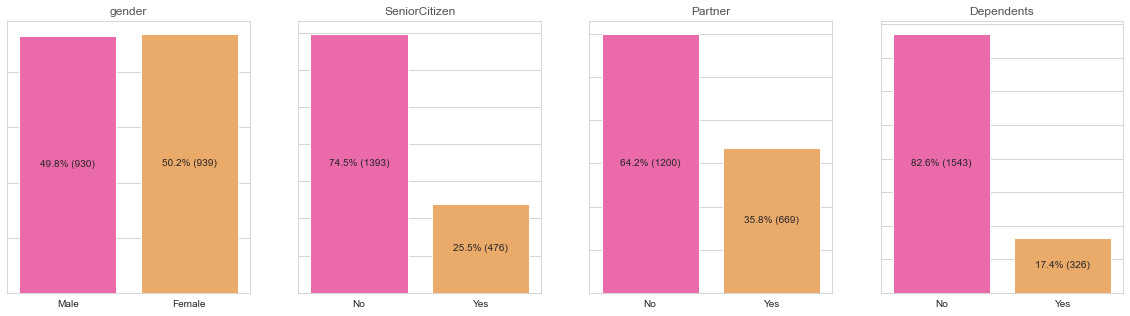

In [56]:
displayCountPlot(personal, df_churn, rows=1, columns=4, figsize=(20,5), export=True)

<b>Category by Services</b>

<br>Here are some observations:</br>
<br>The majority of customers that cancel their subscription have Phone Service enabled.</br>
<br>Those that have fiber optic internet service are almost three times more likely to cancel that those with DSL.</br>
<br>Customers that do not have Online Security, Device Protection, Online Backup, and Tech Support services enabled are more likely to leave.</br>
<br>From these observations, it indicates that customers with less services with the company are very likely to leave.</br>

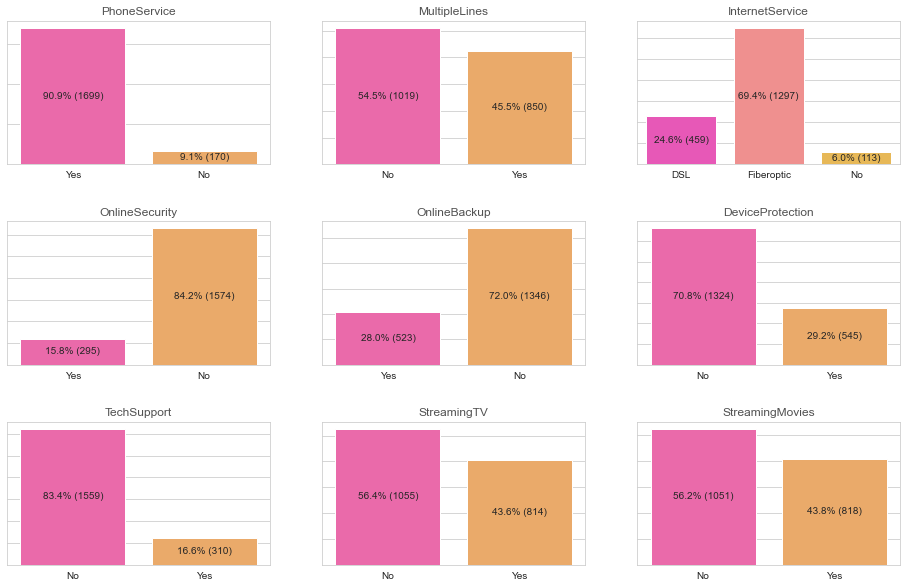

In [57]:
displayCountPlot(services, df_churn, rows=3, columns=3, figsize=(16,10), export=True)

<b>Category by Contract Aspects</b>

<br>Here are some observations:</br>
<br>Those with a month to month contract, and paperless billing with an electronic check payment are most likely to leave.</br>

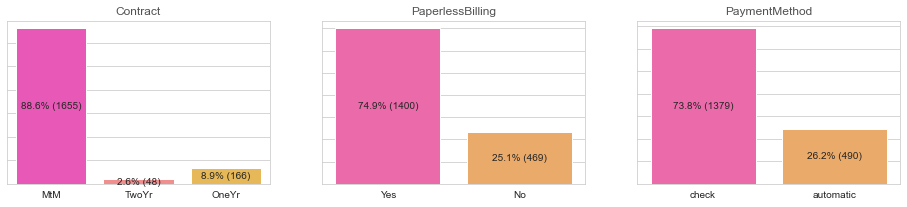

In [58]:
displayCountPlot(contract, df_churn, rows=1, columns=3, figsize=(16,3), export=True)

In [ ]:
df_clean.to_csv('clean_churn.csv') # Export df_clean dataframe to csv file.